# 1N4148 Diode – Junction Capacitance Analysis (LTspice vs Datasheet)

This notebook evaluates the **junction capacitance** ($C_j$) of a 1N4148 diode using **LTspice simulation** and compares it with the **datasheet specification**.

![Junction Capacitance Datasheet]![](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Capacitance.JPG)

## Theory
The junction capacitance of a PN diode under reverse bias is modeled by:

$$
C_j(V) = \frac{C_{j0}}{(1 + \frac{V_R}{V_j})^M}
$$

Where:
- $C_{j0}$: Zero-bias junction capacitance (from SPICE model, `Cjo`)
- $V_R$: Applied reverse voltage
- $V_j$: Junction potential (SPICE `Vj`)
- $M$: Grading coefficient (`M`)

### SPICE Model Used
```
.model D1N4148 D(Is=5.84n N=1.94 Rs=.7017 Ikf=44.17m Xti=3 Eg=1.11 \
Cjo=.95p M=.55 Vj=.75 Fc=.5 Isr=11.07n Nr=2.088 Bv=100 Ibv=100u Tt=11.07n)
```
- $C_{j0} = 0.95\text{ pF}$
- $M = 0.55$, $V_j = 0.75$ V


## AC Simulation Setup in LTspice
1. Reverse bias the diode using a DC voltage source $V_R$.
2. Apply a 1 V AC small-signal source at 1 MHz.
3. Perform `.ac lin 1 1Meg 1Meg`

**Capacitance extraction formula:**
$$
C_j = \frac{|I(V1)|}{2 \pi f V_{AC}} \Rightarrow \frac{|I|}{2\pi f}
$$

Where $I$ is the current through the AC source at frequency $f=1$ MHz.

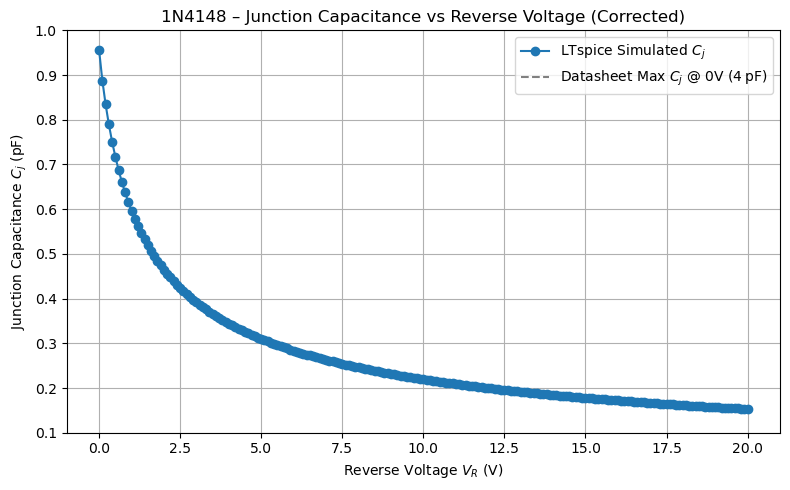

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df["Vr (V)"].values, df["Cd (pF)"].values, marker='o', label="LTspice Simulated $C_j$")
plt.axhline(4, color='gray', linestyle='--', label="Datasheet Max $C_j$ @ 0V (4 pF)")
plt.xlabel("Reverse Voltage $V_R$ (V)")
plt.ylabel("Junction Capacitance $C_j$ (pF)")
plt.ylim(0.1, 1.0)
plt.grid(True)
plt.legend()
plt.title("1N4148 – Junction Capacitance vs Reverse Voltage (Corrected)")
plt.tight_layout()
plt.show()

## Conclusion
- Simulated $C_j(0)$ ≈ **0.95 pF**, matching SPICE model `Cjo`.
- Datasheet specifies up to **4 pF**, so result is well within spec.
- $C_j$ drops with increasing $V_R$ as expected.

---
**GitHub Link to Files**:

[1N4148_Capacitance.csv – LTspice-exported data](https://github.com/lkshirahatti/IntegratedCircuits/tree/main/Diode/SPICE/Data/1N4148_Capacitance.csv)

[1N4148_Capacitance.asc – Simulation schematic](https://github.com/lkshirahatti/IntegratedCircuits/tree/main/Diode/SPICE/Data/1N4148_Capacitance.asc)

[1N4148_Capacitance.JPG – LTspice graph capture](https://github.com/lkshirahatti/IntegratedCircuits/tree/main/Diode/SPICE/Data/1N4148_Capacitance.JPG)
